In [2]:
import numpy as np
import pandas as pd

## Importing Dataset

In [3]:
df = pd.read_csv('income.csv')
df

,income,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week
0,0,39,State-gov,Bachelors,NotMarried,Adm-clerical,Not-in-family,White,Male,40
1,0,50,Self-emp-not-inc,Bachelors,Married,Exec-managerial,Husband,White,Male,13
2,0,38,Private,HS-grad,Separated,Handlers-cleaners,Not-in-family,White,Male,40
3,0,53,Private,11th,Married,Handlers-cleaners,Husband,Black,Male,40
4,0,28,Private,Bachelors,Married,Prof-specialty,Wife,Black,Female,40
...,...,...,...,...,...,...,...,...,...,...
26210,0,27,Private,Assoc-acdm,Married,Tech-support,Wife,White,Female,38
26211,1,40,Private,HS-grad,Married,Machine-op-inspct,Husband,White,Male,40
26212,0,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40
26213,0,22,Private,HS-grad,NotMarried,Adm-clerical,Own-child,White,Male,20


## Shape of dataset before preprocessing

In [4]:
print("Shape of the dataset before preprocessing:", df.shape)
print("\nData types before preprocessing:")
print(df.dtypes)

Shape of the dataset before preprocessing: (26215, 10)

Data types before preprocessing:
income             int64
age                int64
workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
hours-per-week     int64
dtype: object


## Statistical analysis of dataset

In [5]:
df.describe()

,income,age,hours-per-week
count,26215.000000,26215.000000,26215.000000
mean,0.299104,39.045661,40.816632
std,0.457874,13.557816,12.351215
min,0.000000,17.000000,1.000000
25%,0.000000,28.000000,40.000000
50%,0.000000,38.000000,40.000000
75%,1.000000,48.000000,45.000000
max,1.000000,90.000000,99.000000


## Checking null values

In [6]:
df.isna().sum()

income               0
age                  0
workclass         1396
education            0
marital-status       0
occupation        1401
relationship         0
race                 0
sex                  0
hours-per-week       0
dtype: int64

## Filling null values using mode of feature

In [7]:
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)

df.isna().sum()

income            0
age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
dtype: int64

## Dropping duplicates

In [8]:
df.drop_duplicates(inplace=True)

## Handling categorical variables

In [9]:
education_order = [
    'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
    'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate'
]
#// Mapping education and sex
education_mapping = {level: index + 1 for index, level in enumerate(education_order)}
df['education'] = df['education'].map(education_mapping)
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})

#// getting dummies for the rest of categorical variables
df = pd.get_dummies(df, columns=['marital-status', 'race', 'relationship', 'workclass', 'occupation'])

## Correlation matrix before preprocessing (only 3 as other variables aren't in numerical form)

In [10]:
import plotly.graph_objects as go

colors = ['#1CC7F9', '#2DE31E', '#F98A1C']
corr_before = df[['age', 'hours-per-week', 'income']].corr()
fig = go.Figure(data= go.Heatmap(z=corr_before,
                                 x=corr_before.index.values,
                                 y=corr_before.columns.values,
                                 colorscale=colors,
                                 text = corr_before.round(2), texttemplate="%{text}", xgap=3, ygap=3
                                 )
                )
fig.update_layout(title_text='<b>Correlation Matrix <b>',
                  title_x=0.5,
                  titlefont={'size': 24, 'family': 'Courier New'},
                  width=900, height=600,
                  xaxis_showgrid=False,
                  yaxis_showgrid=False,
                  yaxis_autorange='reversed', 
                  paper_bgcolor=None,
                  template='seaborn'
                  )

## Shape of dataset after dropping duplicates

In [11]:
print("\nShape of the dataset after preprocessing:", df.shape)
print("\nData types after preprocessing:")
print(df.dtypes)


Shape of the dataset after preprocessing: (22718, 42)

Data types after preprocessing:
income                          int64
age                             int64
education                       int64
sex                             int64
hours-per-week                  int64
marital-status_Married          uint8
marital-status_NotMarried       uint8
marital-status_Separated        uint8
marital-status_Widowed          uint8
race_Amer-Indian-Eskimo         uint8
race_Asian-Pac-Islander         uint8
race_Black                      uint8
race_Other                      uint8
race_White                      uint8
relationship_Husband            uint8
relationship_Not-in-family      uint8
relationship_Other-relative     uint8
relationship_Own-child          uint8
relationship_Unmarried          uint8
relationship_Wife               uint8
workclass_Federal-gov           uint8
workclass_Local-gov             uint8
workclass_Never-worked          uint8
workclass_Private               uint8


In [12]:
df.describe()

,income,age,education,sex,hours-per-week,marital-status_Married,marital-status_NotMarried,marital-status_Separated,marital-status_Widowed,race_Amer-Indian-Eskimo,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
count,22718.000000,22718.000000,22718.000000,22718.000000,22718.000000,22718.000000,22718.000000,22718.000000,22718.000000,22718.000000,...,22718.000000,22718.000000,22718.000000,22718.000000,22718.000000,22718.000000,22718.000000,22718.000000,22718.000000,22718.000000
mean,0.290651,39.614975,10.187957,0.332820,40.947795,0.473061,0.316313,0.177348,0.033278,0.010916,...,0.033102,0.037943,0.057311,0.098776,0.005194,0.193371,0.022977,0.114315,0.030460,0.050004
std,0.454073,13.702505,2.655901,0.471233,12.888369,0.499285,0.465047,0.381972,0.179364,0.103912,...,0.178906,0.191064,0.232442,0.298368,0.071884,0.394950,0.149835,0.318200,0.171854,0.217959
min,0.000000,17.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,29.000000,9.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,38.000000,10.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,49.000000,13.000000,1.000000,45.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,90.000000,16.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Correlation matrix after preprocessing

In [13]:
corr_after = df.corr()
fig = go.Figure(data= go.Heatmap(z=corr_after,
                                 x=corr_after.index.values,
                                 y=corr_after.columns.values,
                                 colorscale=colors,
                                 text = corr_after.round(2), texttemplate="%{text}", xgap=3, ygap=3
                                 )
                )
fig.update_layout(title_text='<b>Correlation Matrix after <b>',
                  title_x=0.5,
                  titlefont={'size': 24, 'family': 'Courier New'},
                  width=900, height=600,
                  xaxis_showgrid=False,
                  yaxis_showgrid=False,
                  yaxis_autorange='reversed', 
                  paper_bgcolor=None,
                  template='seaborn'
                  )

## Splitting X and Y (X = all features except 'income', Y = 'income' only) with splitting of training and testing set

In [14]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['income'])
y = df['income']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1, random_state=123)

## Normalization using MinMaxScaler

In [15]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(x_train)
x_train_norm = norm.transform(x_train)
x_test_norm = norm.transform(x_test)

## Fitting of training set into Logistic regression and SVM model 

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

lr = LogisticRegression()
svm = SVC()

lr.fit(x_train_norm, y_train)
svm.fit(x_train_norm, y_train)

lr_score = lr.score(x_test_norm, y_test)
svm_score = svm.score(x_test_norm, y_test)
print(f"{lr_score:.3f}")
print(f"{svm_score:.3f}")


C:\Users\edwar\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.809
0.806


## Defining KFold and cross validation of model with test set

In [17]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10, shuffle=True, random_state=2)

log_reg_scores = cross_val_score(lr, x_test_norm, y_test, cv=kfold, scoring='accuracy')
avg_log_reg_score = np.mean(log_reg_scores)
print(f"{avg_log_reg_score:.3f}")

svm_score = cross_val_score(svm, x_test_norm, y_test, cv=kfold, scoring='accuracy')
avg_svm_score = np.mean(svm_score)
print(f"{avg_svm_score:.3f}")

0.809
0.798


## Fine tuning for logistic regression

In [18]:
from sklearn.model_selection import GridSearchCV

lr_params = {
    'solver': ['lbfgs', 'liblinear', 'sag','saga'],
    'max_iter': [200, 300, 400, 500],
    'C': [5, 10, 15, 100]
}

gs_lr_result = GridSearchCV(lr, lr_params, cv=kfold).fit(x_train_norm, y_train)
# print(gs_lr_result.best_score_)
print(gs_lr_result.best_estimator_)

C:\Users\edwar\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\edwar\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Use

## Fine tuning for SVM

In [ ]:
svm = SVC(shrinking=True)

svm_params = {
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.5, 1],
    'C': [0.1, 0.5, 1]
}

gs_svm_result = GridSearchCV(svm, svm_params, cv=kfold).fit(x_train_norm, y_train)
print(gs_svm_result.best_estimator_)

SVC(C=1, gamma=0.1, kernel='linear')


## Score of fine tuning

In [ ]:
print(f"{gs_lr_result.best_score_:.3f}")
print(f"{gs_svm_result.best_score_:.3f}")

0.809
0.808


## Scores of fine tuned best params with testing set

In [ ]:
lr_test = gs_lr_result.best_estimator_.score(x_test_norm, y_test)
print(f"{lr_test:.3f}")
svm_test = gs_svm_result.best_estimator_.score(x_test_norm, y_test)
print(f"{svm_test:.3f}")

0.808
0.803


## KMeans clustering

In [ ]:
from sklearn.cluster import KMeans

clusters = len(np.unique(y_train))
kmeans = KMeans(n_clusters=clusters)
kmeans.fit(x_train_norm)

KMeans(n_clusters=2)

## Splitting of data samples into each cluster

In [ ]:
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

cluster_counts = np.bincount(cluster_labels)

for i, count in enumerate(cluster_counts):
    print(f"Cluster {i+1}: {count} data samples")

Cluster 1: 10797 data samples
Cluster 2: 9649 data samples


## Euclidean distance to compare similarity of clusters from prototype

In [ ]:
from scipy.spatial.distance import euclidean
for i, centroid in enumerate(cluster_centers):
    print(f"Prototype for Cluster {i+1}:\n {centroid}")
    print()

distances = []
for i in range(len(cluster_centers)):
    for j in range(i + 1, len(cluster_centers)):
        distance = euclidean(cluster_centers[i], cluster_centers[j])
        distances.append(distance)

average_distance = np.mean(distances)
print(f"Average distance between prototypes: {average_distance}")

Prototype for Cluster 1:
 [ 2.58537062e-01  5.94387330e-01  5.18569973e-01  3.81962677e-01
  2.96378624e-03  5.99518385e-01  3.33518570e-01  6.39992591e-02
  1.28739465e-02  3.38056868e-02  1.36519404e-01  1.12068167e-02
  8.05594147e-01  3.77475828e-15  4.88746874e-01  5.30702973e-02
  2.50810410e-01  2.07372418e-01 -1.26981758e-15  3.01935723e-02
  6.83523201e-02  4.63091600e-04  7.82995276e-01  1.87089006e-02
  5.59414652e-02  4.30675188e-02  2.77854960e-04  1.49856442e-01
  2.77854960e-04  8.56719459e-02  1.01694915e-01  2.54700380e-02
  4.55682134e-02  5.85347782e-02  1.41242938e-01  8.89135871e-03
  1.86718533e-01  1.71343892e-02  1.12160785e-01  3.07492822e-02
  3.60285264e-02]

Prototype for Cluster 2:
 [ 3.67141460e-01  6.31326217e-01  1.23328842e-01  4.37058086e-01
  1.00000000e+00  8.88178420e-15 -5.44009282e-15  1.59594560e-16
  8.29101461e-03  4.04186962e-02  6.22862473e-02  7.66918852e-03
  8.81334853e-01  8.66307389e-01  8.29101461e-04  9.32739144e-03
  4.56005804e-03  6

## Statistical analysis of each cluster

In [ ]:
cluster_stats = []
for i in range(clusters):
    cluster_data = x_train_norm[cluster_labels == i]
    cluster_mean = np.mean(cluster_data, axis=0)
    cluster_std = np.std(cluster_data, axis=0)
    cluster_stats.append((cluster_mean, cluster_std))

# Print cluster statistics
for i, (mean, std) in enumerate(cluster_stats):
    print(f"Cluster {i+1}:")
    print(f"Mean: {np.mean(mean):.3f}")
    print(f"Standard Deviation: {np.std(std):.3f}")
    print()

Cluster 1:
Mean: 0.165
Standard Deviation: 0.145

Cluster 2:
Mean: 0.160
Standard Deviation: 0.130



## Plot of centroids

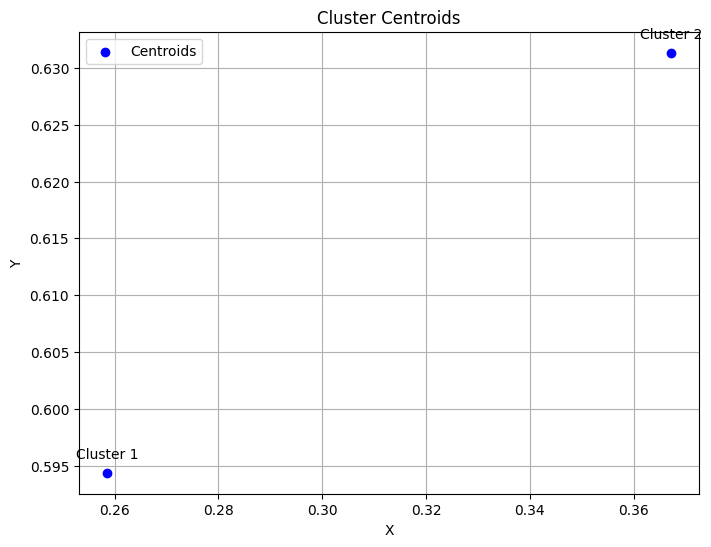

Average distance between prototypes: 1.677


In [ ]:
import matplotlib.pyplot as plt

y_km = kmeans.fit_predict(x_train_norm)

plt.figure(figsize=(8, 6))
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='blue', marker='o', label='Centroids')

# Annotate centroids with cluster numbers
for i, centroid in enumerate(cluster_centers):
    plt.annotate(f'Cluster {i+1}', (centroid[0], centroid[1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Cluster Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

distances = []
for i in range(len(cluster_centers)):
    for j in range(i + 1, len(cluster_centers)):
        distance = euclidean(cluster_centers[i], cluster_centers[j])
        distances.append(distance)

# Calculate average distance between centroids
average_distance = np.mean(distances)
print(f"Average distance between prototypes: {average_distance:.3f}")


## Accuracy of clustering with test set

In [ ]:
from sklearn.metrics import accuracy_score

cluster_counts = len(np.unique(cluster_labels))

test_cluster_labels = kmeans.predict(x_test_norm)

cluster_to_class_mapping = {}

for cluster_id in range(cluster_counts):
    cluster_samples = y_train[cluster_labels == cluster_id]
    most_frequent_class = np.argmax(np.bincount(cluster_samples))
    cluster_to_class_mapping[cluster_id] = most_frequent_class

predicted_labels = [cluster_to_class_mapping[cluster_label] for cluster_label in test_cluster_labels]

clustering_accuracy = accuracy_score(y_test, predicted_labels)

print(f"Clustering Accuracy with Testing Set: {clustering_accuracy:.3f}")

Clustering Accuracy with Testing Set: 0.282


## Silhouette score of KMeans clustering

In [ ]:
from sklearn.metrics import silhouette_score

test_silhouette_avg = silhouette_score(x_test_norm, predicted_labels)

print(f"Silhouette Score with Testing Set: {test_silhouette_avg:.3f}")

KeyboardInterrupt: 